In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp500 = yf.Ticker("MSFT")
sp500 = sp500.history(period="max")

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054893,0.062965,0.054893,0.060274,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060274,0.063504,0.060274,0.062427,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062427,0.064042,0.062427,0.063503,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063503,0.064042,0.061350,0.061888,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061889,0.062427,0.060274,0.060812,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-16 00:00:00-05:00,370.959991,376.350006,370.179993,376.170013,27182300,0.0,0.0
2023-11-17 00:00:00-05:00,373.609985,374.369995,367.000000,369.850006,40157000,0.0,0.0
2023-11-20 00:00:00-05:00,371.220001,378.869995,371.000000,377.440002,52465100,0.0,0.0


<AxesSubplot:xlabel='Date'>

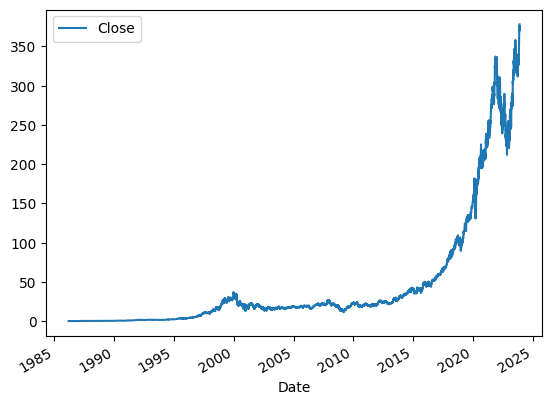

In [4]:
sp500.plot.line(y="Close", use_index=True)

In [5]:
# Clean up data
columns_to_remove = ["Dividends", "Stock Splits"]
sp500 = sp500.drop(columns=columns_to_remove)
sp500["Tomorrow"] = sp500["Close"].shift(-1)

# Shows whether the the price will increase or decrease
sp500["Trend"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

# Remove historical data where fundamental shifts in the market might affect prediction
sp500 = sp500.loc["1990-01-01":].copy()

# Remove todays data so we can train the model properly
sp500 = sp500.iloc[:-1]

sp500

,Open,High,Low,Close,Volume,Tomorrow,Trend
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.375638,0.382096,0.370794,0.382096,53035200,0.384248,1
1990-01-03 00:00:00-05:00,0.385325,0.388554,0.381019,0.384248,113774400,0.395550,1
1990-01-04 00:00:00-05:00,0.384249,0.396088,0.382096,0.395550,125740800,0.385863,0
1990-01-05 00:00:00-05:00,0.393936,0.396088,0.385325,0.385863,69566400,0.391782,1
1990-01-08 00:00:00-05:00,0.385325,0.391782,0.381019,0.391782,58982400,0.390706,0
...,...,...,...,...,...,...,...
2023-11-15 00:00:00-05:00,371.279999,373.130005,367.109985,369.670013,26860100,376.170013,1
2023-11-16 00:00:00-05:00,370.959991,376.350006,370.179993,376.170013,27182300,369.850006,0
2023-11-17 00:00:00-05:00,373.609985,374.369995,367.000000,369.850006,40157000,377.440002,1


In [6]:
# Adding features to increase prediction accuracy
# sp500["PrevTrend"] = sp500["Trend"].shift(10).mean()

# sp500

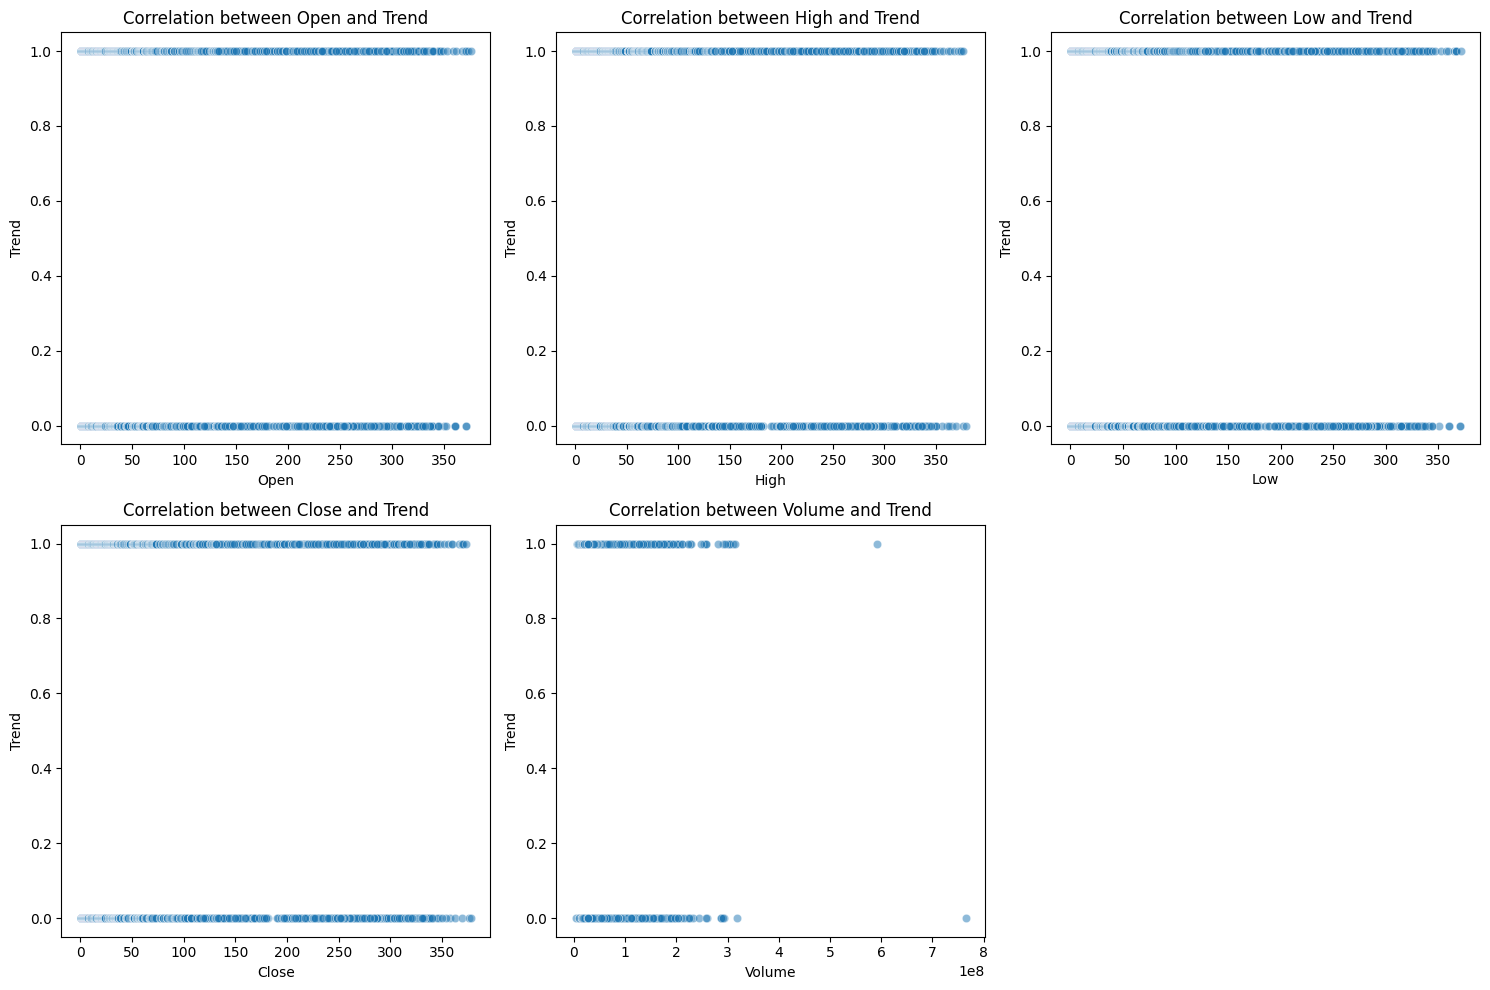

In [7]:
# Showing Data Correlation for trend
features = ["Open", "High", "Low", "Close", "Volume"]
label = 'Trend'

# Plot scatter plots for correlations
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=sp500, x=feature, y=label, alpha=0.5)
    plt.title(f'Correlation between {feature} and {label}')
    plt.xlabel(feature)
    plt.ylabel(label)

plt.tight_layout()
plt.show()

In [8]:
# Setting up data for training and testing
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [9]:
from sklearn.linear_model import LinearRegression

# Setting up linear regression Classifier for price prediction
linear_features = ["Open", "High", "Low", "Volume"]
X_train = train[linear_features]
y_train = train["Close"]

# Extracting the features for testing
X_test = test[linear_features]

In [10]:
# Creating the Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

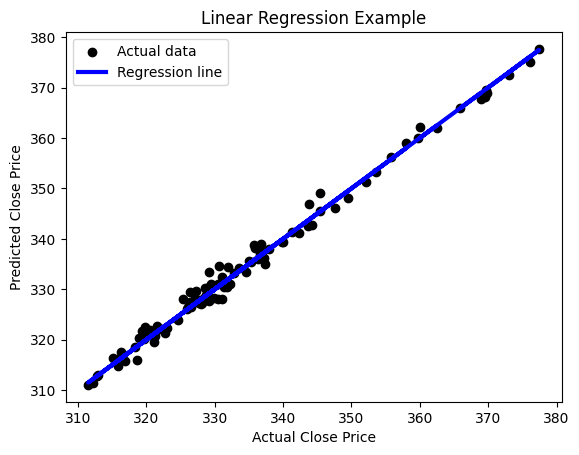

In [11]:
# Making predictions using the trained model
y_pred = model.predict(X_test)

# Visualizing the results
plt.scatter(test["Close"], y_pred, color='black', label='Actual data')
plt.plot(test["Close"], test["Close"], color='blue', linewidth=3, label='Regression line')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
# Showing error
mse = mean_squared_error(test["Close"], y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.2269532592837247


In [13]:
# Add to data for trend prediction
X_test = sp500[linear_features]
data_pred = model.predict(X_test)

sp500["Predicted_Tomorrow_Close"] = data_pred
sp500["Predicted_Tomorrow_Close"] = sp500["Predicted_Tomorrow_Close"].shift(-1)
sp500 = sp500.dropna()

sp500

,Open,High,Low,Close,Volume,Tomorrow,Trend,Predicted_Tomorrow_Close
Date,,,,,,,,
1990-01-02 00:00:00-05:00,0.375638,0.382096,0.370794,0.382096,53035200,0.384248,1,0.366741
1990-01-03 00:00:00-05:00,0.385325,0.388554,0.381019,0.384248,113774400,0.395550,1,0.372020
1990-01-04 00:00:00-05:00,0.384249,0.396088,0.382096,0.395550,125740800,0.385863,0,0.380566
1990-01-05 00:00:00-05:00,0.393936,0.396088,0.385325,0.385863,69566400,0.391782,1,0.381479
1990-01-08 00:00:00-05:00,0.385325,0.391782,0.381019,0.391782,58982400,0.390706,0,0.384562
...,...,...,...,...,...,...,...,...
2023-11-14 00:00:00-05:00,370.258511,371.196609,366.605921,369.519989,27683900,369.670013,1,369.564544
2023-11-15 00:00:00-05:00,371.279999,373.130005,367.109985,369.670013,26860100,376.170013,1,375.040703
2023-11-16 00:00:00-05:00,370.959991,376.350006,370.179993,376.170013,27182300,369.850006,0,368.936861


In [14]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Setting up Random Forest Classifier for trend
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

rand_features = ["Open", "High", "Low", "Close", "Volume", "Predicted_Tomorrow_Close"]
randForest = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

randForest.fit(train[rand_features], train["Trend"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
from sklearn.metrics import precision_score
import pandas as pd
prediction = randForest.predict(test[rand_features])
prediction = pd.Series(prediction, index=test.index)
precision_score(test["Trend"], prediction)

0.603448275862069